# Chapter 2: Small Worlds And Large Worlds - Exercises

In [14]:
from enum import Enum, auto

from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

### 2E1 `The probability of rain on Monday`

Answer:

**(2)** $P(rain|Monday)$ & **(4)** $P(rain,Monday) / P(Monday)$

### 2E2 $P(Monday|rain)$

Answer:

**(3)** `The probability that it is Monday, given that it is raining`

### 2E3 `The probability that it is Monday given that it is raining`

Answer:

**(1)** $P(Monday|rain)$ & **(4)** $\frac{P(rain|Monday) \dot P(rain)}{P(Monday)}$

### 2E4

Answer:

Our generated probabilities depend solely on the data and the way we generate our probability. If we collect more data or use different models, then the probability will be different. When we say that the probability of water is 0.7, it means that if we roll the globe again, **in light of the data collected**, we have a chance of 70% of landing in water, which is the same as the estimated percentage of water in all the surface of the globe.

### 2M1

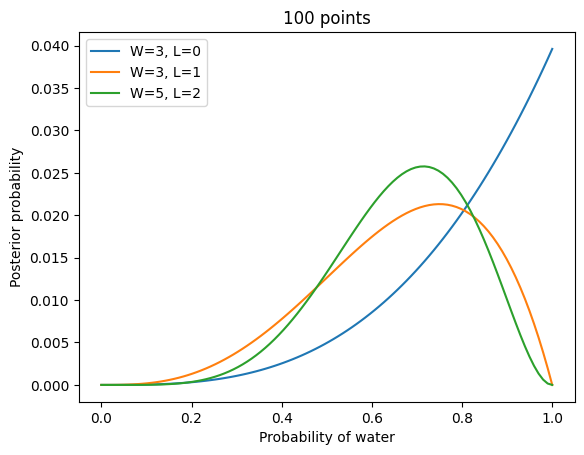

In [16]:
GRID_POINTS = 100

class Prior(Enum):
    uniform = auto()
    step = auto()
    


def plot_approximate_posterior_distribition(
    water: int, land: int, prior: Prior) -> None:
    """Plot the grid approximate posterior distribution.
    
    This plot is meant specifically for Exercise 2M1.
    
    Args:
        water: The number of tosses that finished in water.
        land: The number of tosses that finished in land.
        prior: The type of prior to use. Options are listed
            the Prior Enum.
    """
    # Approximate through a grid
    p_grid = np.linspace(0,1,GRID_POINTS)
    # Uniform prior
    if prior == Prior.uniform:
        prior = np.repeat(1,GRID_POINTS)
    elif prior == Prior.step:
        prior = np.where(p_grid < 0.5, 0, 1)
    likelihood = stats.binom.pmf(k=water, n=water+land, p=p_grid)
    posterior = likelihood * prior
    posterior = posterior / posterior.sum()

    plt.plot(p_grid, posterior, label = f"W={water}, L={land}")
    plt.title(f"{GRID_POINTS} points")
    plt.xlabel('Probability of water')
    plt.ylabel('Posterior probability')
    plt.legend()
    
plot_approximate_posterior_distribition(3, 0, Prior.uniform)
plot_approximate_posterior_distribition(3, 1, Prior.uniform)
plot_approximate_posterior_distribition(5, 2, Prior.uniform)

### 2M2

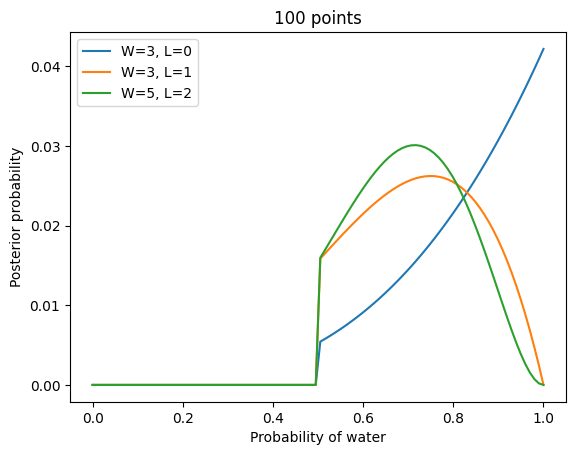

In [17]:
plot_approximate_posterior_distribition(3, 0, Prior.step)
plot_approximate_posterior_distribition(3, 1, Prior.step)
plot_approximate_posterior_distribition(5, 2, Prior.step)